<a href="https://colab.research.google.com/github/mascalmeida/colab_classes/blob/main/overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sobreajuste, complexidade x erro, bias-variance tradeoff (<a href="http://www.gamma.ufba.br/">Gamma</a>)

Docente: Karla Esquerre (<a href="https://github.com/kesquerre">@kesquerre</a>)

Facilitador: Lucas Mascarenhas (<a href="https://github.com/mascalmeida">@mascalmeida</a>)



In [ ]:
# Pacotes
## Manipulação e visualização de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Modelagem
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# Importando dados direto do site
data = pd.read_csv('https://raw.githubusercontent.com/mrunalmetkar/Linear_Regression/main/student_scores%20-%20student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


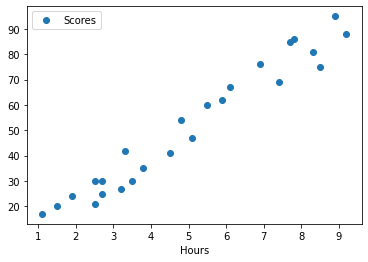

In [ ]:
# Visualizando as variáveis de interesse
data.plot(x='Hours', y='Scores', style='o')
plt.show()

In [ ]:
# Pré-processamento
## Convertendo os tipos das variáveis
data['Scores'] = data['Scores'].astype(float)
## Lidando com os valores faltantes (NaN)
data.dropna(inplace=True)
## Definindo a entrada e a saída
x = data.loc[:, 'Hours'].values.reshape(-1, 1)
y = data.loc[:, 'Scores'].values.reshape(-1, 1)
## Dividindo o dataset entre treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [ ]:
# Treinando o modelo
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predição e avaliação do modelo
## Usando dados de teste
y_pred_test = model.predict(x_test)
test_sample = metrics.mean_squared_error(y_test, y_pred_test)
print('Erro de teste:', test_sample)
## Usando dados de treino
y_pred_train = model.predict(x_train)
train_sample = metrics.mean_squared_error(y_train, y_pred_train)
print('Erro de treino:', train_sample)

Erro de teste: 37.563452579516046
Erro de treino: 27.008868510608302


In [ ]:
# Aumentando a complexidade
poly = PolynomialFeatures(degree=12)
x2_train = poly.fit_transform(x_train)
x2_test = poly.fit_transform(x_test)
# Treinando o modelo
model2 = LinearRegression()
model2.fit(x2_train, y_train)
# Predição e avaliação do modelo
## Usando dados de teste
y2_pred_test = model2.predict(x2_test)
test2_sample = metrics.mean_squared_error(y_test, y2_pred_test)
print('Erro de teste:', test2_sample)
## Usando dados de treino
y2_pred_train = model2.predict(x2_train)
train2_sample = metrics.mean_squared_error(y_train, y2_pred_train)
print('Erro de treino:', train2_sample)

Erro de teste: 86.08344814679602
Erro de treino: 8.861495561920645


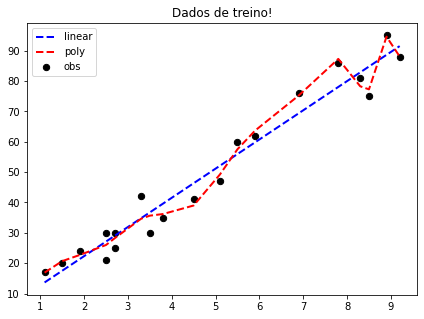

In [ ]:
# Visualizando sobreajuste - dados de treino
## Ordenando os dados
xs, ys, yp, y2p = zip(*sorted(zip(x_train, y_train, y_pred_train, y2_pred_train)))
## Montando o gráfico
plt.figure(figsize=(7, 5))
plt.title('Dados de treino!')
plt.scatter(xs, ys, color = 'k', label='obs', s=40)
plt.plot(xs, yp, color = 'b', ls = '--', label='linear', linewidth = 2)
plt.plot(xs, y2p, color = 'r', ls = '--', label='poly', linewidth = 2)
plt.legend()
plt.show()

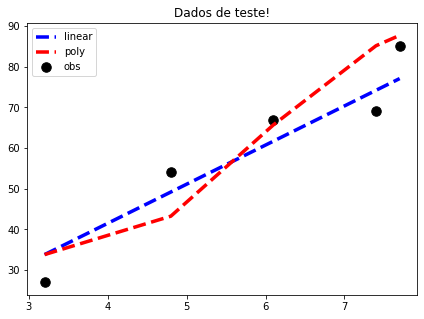

In [ ]:
# Visualizando sobreajuste - dados de teste
## Ordenando os dados
xs, ys, yp, y2p = zip(*sorted(zip(x_test, y_test, y_pred_test, y2_pred_test)))
## Montando o gráfico
plt.figure(figsize=(7, 5))
plt.title('Dados de teste!')
plt.scatter(xs, ys, color = 'k', label='obs', s=90)
plt.plot(xs, yp, color = 'b', ls = '--', label='linear', linewidth = 3.5)
plt.plot(xs, y2p, color = 'r', ls = '--', label='poly', linewidth = 3.5)
plt.legend()
plt.show()

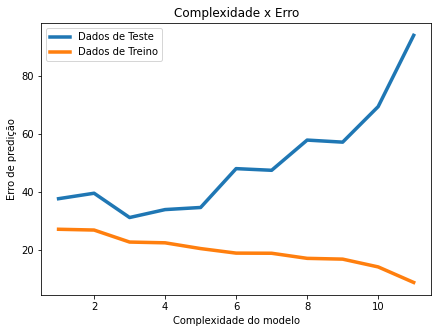

In [ ]:
# Montando gráfico interativo
list_train = []
list_test = []
xis = range(1,12)
for i in xis:
  # Aumentando a complexidade
  poly = PolynomialFeatures(degree=i)
  x2_train = poly.fit_transform(x_train)
  x2_test = poly.fit_transform(x_test)
  # Treinando o modelo
  model2 = LinearRegression()
  model2.fit(x2_train, y_train)
  # Predição e avaliação do modelo
  ## Usando dados de teste
  y2_pred_test = model2.predict(x2_test)
  test2_sample = metrics.mean_squared_error(y_test, y2_pred_test)
  ## Usando dados de treino
  y2_pred_train = model2.predict(x2_train)
  train2_sample = metrics.mean_squared_error(y_train, y2_pred_train)
  ## Armazenando os valores de erro
  list_test.append(test2_sample)
  list_train.append(train2_sample)

# Gerando gráfico (complexidade vs erro)
plt.figure(figsize=(7, 5))
plt.title('Complexidade x Erro')
plt.xlabel('Complexidade do modelo')
plt.ylabel('Erro de predição')
plt.plot(xis, list_test, label='Dados de Teste', linewidth = 3.5)
plt.plot(xis, list_train, label='Dados de Treino', linewidth = 3.5)
plt.legend()
plt.show()



**REFERÊNCIAS**


*   [Linear Regression in Python with Scikit-Learn](https://stackabuse.com/linear-regression-in-python-with-scikit-learn/)
*   [Polynomial regression using scikit-learn](https://stats.stackexchange.com/questions/58739/polynomial-regression-using-scikit-learn) 
*   [StatsLearning Chapter 5 - part 1](https://youtu.be/ngrOYWgJjb4?t=216) 






